# Bayesian Machine Learning for Health Data


### Task 1 : -  Implement Inverse CDF sampling for the Fréchet distribution. With sufficient number of samples, plot the kernel density estimation plot and show that you are able to match the PDF. Also, reproduce the following figure and visualize it:
https://en.wikipedia.org/wiki/File:Frechet_pdf.svg


(0.0, 5.0)

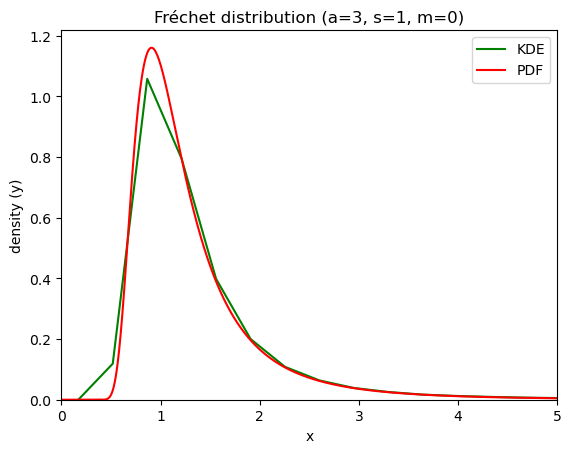

In [5]:
import numpy as np
import matplotlib.pyplot as mat
import seaborn as viz
#function for inverse cdf of Fréchet distribution
def invertCDF(x):
    m=0 #location parameter
    s=1 #scale parameter
    a=3 #shape parameter
    return m + s*np.power(np.log(1/x),-1/a)

#function for pdf of Fréchet distribution
def pdf(x,a,s):
  m=0
  return (a/s) * np.power((x-m)/s, -(a+1)) * np.exp(-(s/(x-m))**a)

numOfSamples = np.random.uniform(size = 10**5)
#taking sample data and generating inverse cdf of them
sampleArray = invertCDF(numOfSamples)

#generating kernel distribution function
viz.kdeplot(sampleArray,color="green")
    
x = np.linspace(0.01, 5.0, 10**5)
pdfX =pdf(x,3,1)
#generating actual probability distribution function
mat.plot(x, pdfX, color="red")

mat.legend(['KDE', 'PDF'])
mat.xlabel('x')
mat.ylabel('density (y)')
mat.title('Fréchet distribution (a=3, s=1, m=0)')
mat.xlim([0, 5])

I have plotted both Kernel Distribution and PDF of Fréchet distribution in the same graph so as to compare it.
As you can see,it is seen that KDE is good fit for PDF (which I used from calculating inverse CDF and then parsing 
that data from seaborn library.)

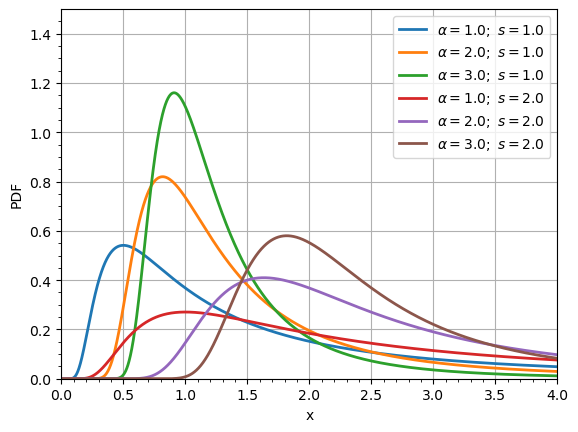

In [8]:
x = np.linspace(1e-9, 4, 10**5)

fig, ax = mat.subplots()

params = [(1., 1.), (2., 1.), (3., 1.), (1., 2.), (2., 2.), (3., 2.)]

for a, s in params:
    ax.plot(x,pdf(x, a, s), label=r'$\alpha={};$ $s={}$'.format(a, s), linewidth=2)

ax.grid(True)
ax.minorticks_on()
ax.legend(loc=1)
ax.set_xlim(0, 4)
ax.set_ylim(0, 1.5)
ax.set_xlabel("x")
ax.set_ylabel("PDF")
mat.savefig("Frechet_pdf.svg", bbox_inches="tight", pad_inches=.15)
